In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import pandas as pd

In [6]:
# Read data
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
from sklearn.preprocessing import StandardScaler

# instance of the MinMaxScaler
sc = StandardScaler()

# fit the scaler to the data
sc.fit(data)

# transform the data using the scaler
data_scaled = sc.transform(data)

In [14]:
# pd.DataFrame(data_scaled).head()
# new_df = pd.DataFrame(data_scaled)
# new_df.columns = data.columns
# new_df.head()

In [16]:
# # Initialize K-Means with the desired number of clusters
# kmeans = KMeans(n_clusters=3)

# # Fit the K-Meanas model to the data
# kmeans.fit(data)

# # Get cluster assignments for each data point
# cluster_assignments = kmeans.labels_

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# cluster_assignments

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [ ]:
# # Plot the data points with color-coded clusters
# plt.scatter(data[:, 0], data[:, 1])

C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

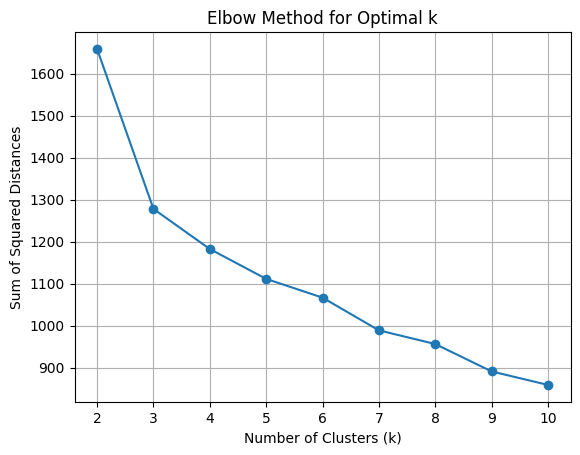

In [25]:
# Calculate the sum of squared distances for different values of k
sse = []
silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    cluster_assignments = kmeans.labels_
    silhouette_avg = silhouette_score(data_scaled, cluster_assignments)
    silhouette_scores[str(k)] = silhouette_avg
    
# Plot the elbow curve
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [26]:
silhouette_scores

{'2': 0.25931695553182543,
 '3': 0.2848589191898987,
 '4': 0.24464999447319075,
 '5': 0.20217104660663007,
 '6': 0.1864670679711404,
 '7': 0.2106064930739033,
 '8': 0.1365087916747834,
 '9': 0.1477523618919662,
 '10': 0.137233100036934}